# Student name:

# Student ID:

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

# Task 1a

These functions are provided to assist you in Task 1a

In [21]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [24]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

Please add cells according to your own requirements.

Ein:  0.5285714285714286
Eout:  0.6333333333333333
Accuracy:  0.36666666666666664


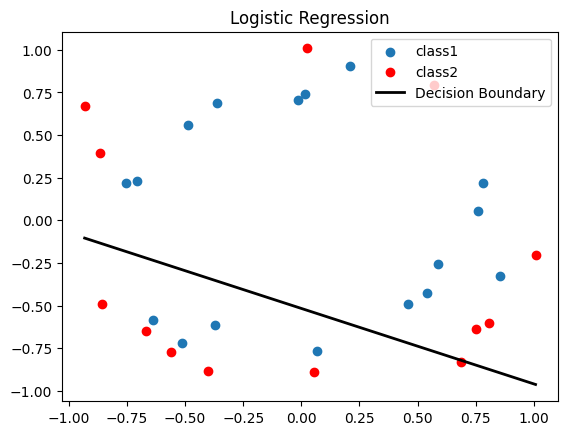

In [25]:
import pandas as pd

# get the training data
df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)


# using Logistic Regression
clf = LogisticRegression()
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# fit the model
clf = clf.fit(X_train,y_train)

accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)
print("Accuracy: ", accuracy_score)

# plot the data points as class 1 and class 2
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2")


weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()
# get the two points on the decision boundary using the weights generated and the decision boundary function provided
boundary_points = decision_boundary(weights, x_min, x_max)

plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title("Logistic Regression without ")
plt.legend(loc='upper right')


<span style = "color:green">The above plot indicates that the decision boundary drawn using the weights identified by the Logistic Regression is not ideal for classification of this data, as the decision boundary only classifies 36.6% of the data accurately. Here we have the Eout as 63.3%. By looking at the data we can see that the test data cannot be classified using a linear boundary. Hence we need to transform this data into another space for it to be classified with a binary classifier. Looking at the data we see a pattern that tells us that squaring the input values might be helpful in approximating the target function</span>

Ein:  0.5
Eout:  0.5333333333333333
Accuracy:  0.4666666666666667


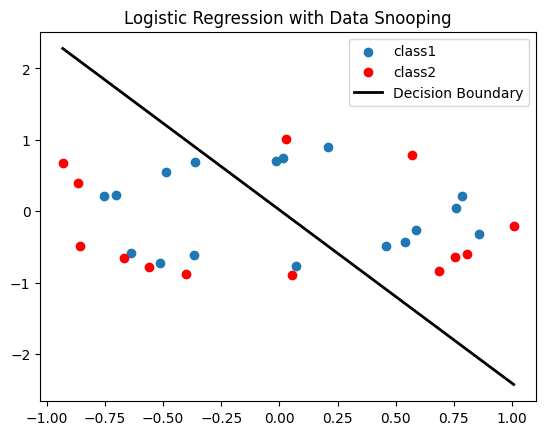

In [26]:


import pandas as pd

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)

# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

# using Logistic Regression
clf = LogisticRegression()
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]


# snooping the data for X_train from X_test by taking 30 values
X_test_sample = X_test.sample(n=30, random_state=1)
X_train = pd.concat([X_train, X_test_sample]).reset_index(drop=True)

# snooping the data for y_train from y_test by taking 30 values
y_test_sample = y_test.sample(n=30, random_state=1)
y_train = pd.concat([y_train, y_test_sample]).reset_index(drop=True)

# fit the model
clf = clf.fit(X_train,y_train)

# get the test data
X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)
print("Accuracy: ", accuracy_score) # note here the accuracy is higher than the previous one due to the snooping done

# plot the data points as class 1 and class 2
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2")


weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()
boundary_points = decision_boundary(weights, x_min, x_max)

# get the two points on the decision boundary using the weights generated and the decision boundary function provided
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title("Logistic Regression with Data Snooping")
plt.legend(loc='upper right')


<span style="color:green">In the example above we used the Logistic Regression, however we did snoop into the test set to see what 20 of the records are and used that in the training of the classifier. As a result we can see the Eout decreasing to 53% from the 63% without snooping and the Accuracy increasing to 46% from 36% . This is a clear demonstration of data snooping</span>

### Approximation by squaring the input features

Accuracy:  0.9
Ein:  0.08571428571428574
Eout:  0.09999999999999998


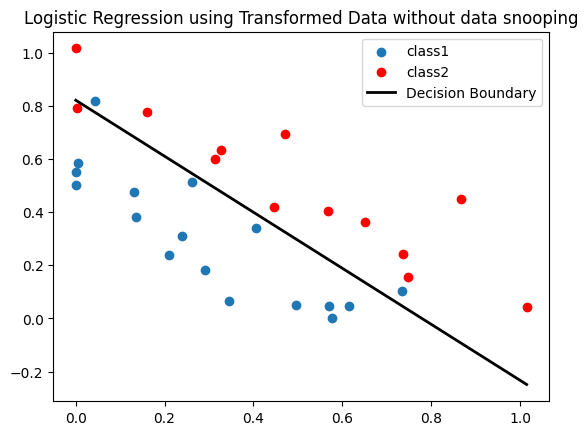

In [28]:
import pandas as pd

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

# Transforming the data to order of 2
X_train = X_train.applymap(lambda x: x**2)
# fit the model
clf = clf.fit(X_train,y_train)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# Transforming the data to order of 2
X_test = X_test.applymap(lambda x: x**2)

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data without data snooping')
plt.legend()


<span style = "color:green">Applying a non-linear transformation(transforming the data using a square function) on the train and test data improves the accuracy score of the Logistic Regression when applied. The accuracy score illustrates that the model is 90% accurate for the test data. ie 90% of the data are classified correctly and the Eout decreased to 9.9%. This can be observed from the graph above. This illustrates that for this hypothesis, the model closely approximates to the target function. This proves that, the data provided has circular pattern, and the square function applied to it would be best fit the approximation. </span>

Accuracy:  0.9
Ein:  0.07499999999999996
Eout:  0.09999999999999998


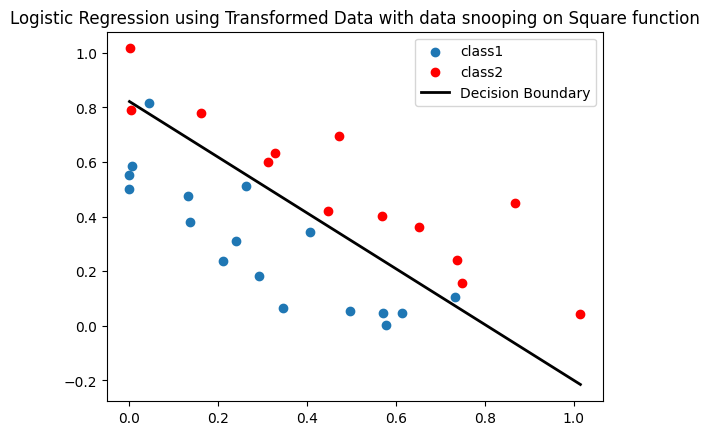

In [62]:
import pandas as pd

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

X_test_sample = X_test.sample(n=10, random_state=1)
X_train = pd.concat([X_train, X_test_sample]).reset_index(drop=True)

y_test_sample = y_test.sample(n=10, random_state=1)
y_train = pd.concat([y_train, y_test_sample]).reset_index(drop=True)
# Transforming the data to order of 2
X_train = X_train.applymap(lambda x: x**2)
# fit the model
clf = clf.fit(X_train,y_train)


# Transforming the data to order of 2
X_test = X_test.applymap(lambda x: x**2)

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data with data snooping on Square function')
plt.legend()


### Approximation by cubing input features

Ein:  0.5857142857142856
Eout:  0.7666666666666666
Accuracy:  0.23333333333333334


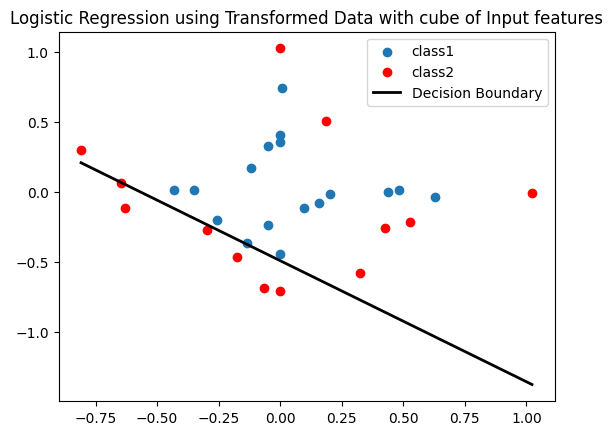

In [30]:
import pandas as pd

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)

# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

# Transforming the data to order of 2
X_train = X_train.applymap(lambda x: x**3)
# fit the model
clf = clf.fit(X_train,y_train)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# Transforming the data to order of 2
X_test = X_test.applymap(lambda x: x**3)

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data with cube of Input features')
plt.legend()


<span style = "color:green"> Here the accuracy score decreases to 23%. This tells us that the model is not a good fit for generalization as it only maps 23% of the data correctly. This can be viewed from the plot above.<span>

Ein:  0.09999999999999998
Eout:  0.19999999999999996
Accuracy:  0.8


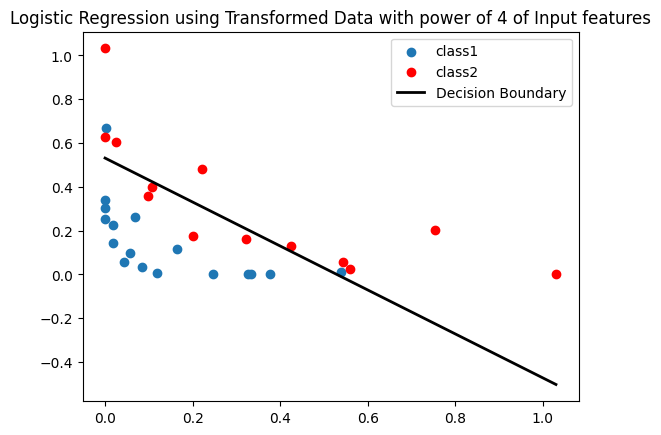

In [63]:
import pandas as pd

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

# Transforming the data to order of 2
X_train = X_train.applymap(lambda x: x**4)
# fit the model
clf = clf.fit(X_train,y_train)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# Transforming the data to order of 2
X_test = X_test.applymap(lambda x: x**4)

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data with power of 4 of Input features')
plt.legend()


<span style="color:green"> Here the accuracy is 80%. This again proves that the square transformation(power of 2) has more accuracy as the power 4 demonstrates a similar pattern with the given data. The Eout is 19%, which is considerably higher than the Eout of the square transformation</span>

### Power of 9

Ein:  0.5714285714285714
Eout:  0.6333333333333333
Accuracy:  0.36666666666666664


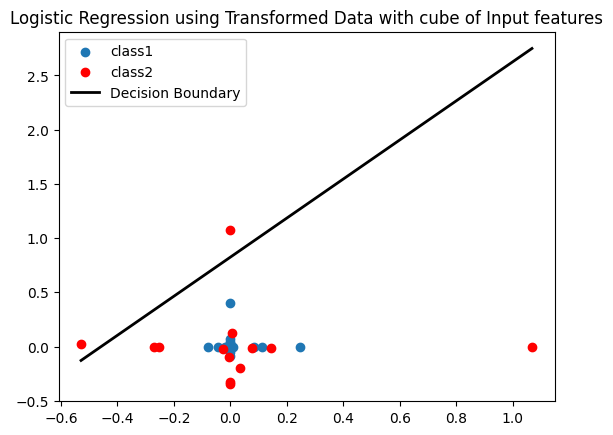

In [283]:
import pandas as pd

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

# Transforming the data to order of 2
X_train = X_train.applymap(lambda x: x**9)
# fit the model
clf = clf.fit(X_train,y_train)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

# Transforming the data to order of 2
X_test = X_test.applymap(lambda x: x**9)

# get the accuracy score
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

# plot the points 
plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2") 
print("Accuracy: ", accuracy_score)

# get the weights trained from the model
weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

# get the min and max of the x-axis for plotting the graph
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()

# plot the graph
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data with cube of Input features')
plt.legend()



<span style="color: green"> The power of 9 does not seem to be better than without any transformation based on the accuracy matrix.</span>

### Approximation by using log function on input features

Ein:  0.4714285714285714
Eout:  0.5666666666666667
Accuracy:  0.43333333333333335


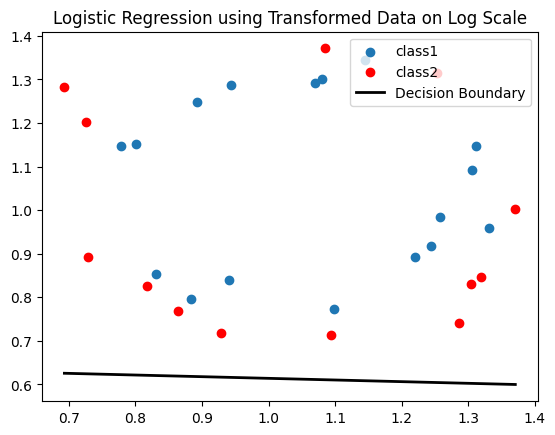

In [284]:
import pandas as pd

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

# Transforming the data on log scale
X_train_shifted = X_train - X_train.min().min() + 1 # so that all values are positive
X_train = X_train_shifted.applymap(lambda x: np.log(x+1))
# fit the model
clf = clf.fit(X_train,y_train)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

X_test_shifted = X_test - X_test.min().min() + 1
X_test = X_test_shifted.applymap(lambda x: np.log(x+1))
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2")
print("Accuracy: ", accuracy_score)

weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data on Log Scale')
plt.legend(loc='upper right')

<span style="color:green">Here we see an accuracy score of 43%. This illustrates its a better model when compared to the cubing model created above. However, as can be seen the classifier boundary is incorrectly drawn. I assume the 43% is due to the fact that all points belonging to class 2(red points) are above the decision boundary, as for the square model we see this is the desired output.</span>

### Approximation using square root

Ein:  0.4714285714285714
Eout:  0.6
Accuracy:  0.4


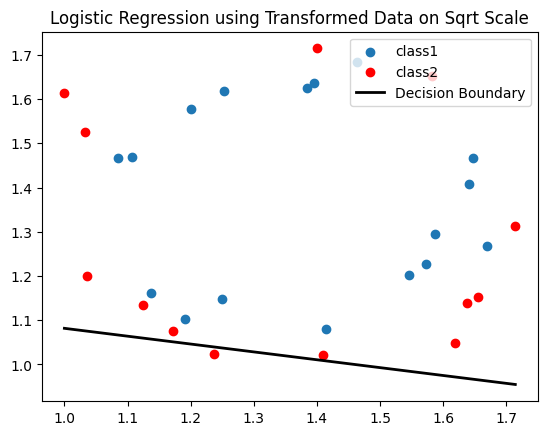

In [285]:
import pandas as pd

df = pd.read_csv("Et2_Classification_TrainingData.csv", header=None)
# display(df) # display the data
# using Logistic Regression
clf = LogisticRegression()
# get the training data
X_train = df.iloc[:,0:2]
y_train = df.iloc[:, 2]

# Transforming the data on sqrt
X_train = X_train_shifted.applymap(lambda x: np.sqrt(x))
# fit the model
clf = clf.fit(X_train,y_train)
# get the test data
df_test = pd.read_csv("Et2_Classification_TestData.csv", header=None)

X_test = df_test.iloc[:,0:2]
y_test = df_test.iloc[:, 2]

X_test = X_test_shifted.applymap(lambda x: np.sqrt(x))
accuracy_score = clf.score(X_test,y_test)
train_accuracy_score = clf.score(X_train,y_train)
print("Ein: ", 1 - train_accuracy_score)
print("Eout: ", 1 - accuracy_score)

plt.scatter(X_test[y_test==1].iloc[:,0], X_test[y_test==1].iloc[:,1], label = "class1") 
plt.scatter(X_test[y_test==-1].iloc[:,0], X_test[y_test==-1].iloc[:,1], color = "red", label = "class2")
print("Accuracy: ", accuracy_score)

weights = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]
x_min = X_test.iloc[:, 0].min()
x_max = X_test.iloc[:, 0].max()
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')
plt.title('Logistic Regression using Transformed Data on Sqrt Scale')
plt.legend(loc='upper right')


<span style = "color:green">Here the accuracy score is 40%. This is also not a good fit for the test data.</span>

In [253]:
# from sklearn.preprocessing import PolynomialFeatures

# # Create a PolynomialFeatures object
# poly = PolynomialFeatures(degree=2, include_bias=False)


# # Fit and transform the training data
# X_train_poly = poly.fit_transform(X_train)

# # Fit the model
# clf = clf.fit(X_train_poly, y_train)

# # Transform the test data
# X_test_poly = poly.transform(X_test)

# # Calculate the accuracy
# accuracy_score = clf.score(X_test_poly, y_test)
# print("Accuracy: ", accuracy_score)

## Reflection

After engaging with your peers, reflect on this task and answer the following questions: 
- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.
- Explain how data transformations effect the complexity of your model.

Your reflection..  
<span style = "color:green">When the given data was fitted with Logistic Regression we observed and </span>

Ein:0.5285714285714286 and   
Eout:  0.6333333333333333.  
  
<span style = "color:green">These Ein and Eout are high. This tells us that the model is a high biased model with a low complexity value. Looking at the plot, we clearly see that the regression line fails to capture the relationship to apply classification to the data. Also we observe that the data points cannot be linearly seperated in this space. Hence we try to shift the data to a higher dimension, thereby adding more complexity and reducing the effect of bias, say, order 2,3,4, log etc. and observe that the data points do very well generalize on the order 2 polynomial hypothesis, as the Accuracy increased to 90% with</span>
  
Ein:  0.08571428571428574 and   
Eout:  0.09999999999999998  
  
<span style = "color:green">This is done in accordance with the bias-variance tradeoff where increasing complexity leads to decrease in train and test error, to a valid limit.</span>

<span style = "color:green">Data transformation helps us expose hidden patterns in a data set. In the above example, applying a second order function to transform the provided data set enabled the data to be linearly separated using a hyperplane that would not have been possible without the transformation. This can help capture non-linear relationships between input features thereby enabling an easy seperation of dataset using linear boundary. In the examples above I have applied the logarithmic and sqrt transformation apart from the polynomial transformations. However the best result was observed with a polynomial transformation with a power of 2. If we had more features we could have used PCA to identify and reduce the number of features</span>

<span style = "color:green">Adding features and transforming the data can make the model more complex if there are a lot of features added and the method of creation of featueres is complex. This would lead to overfitting as it would lead to memorizing the training data thereby leading to poor generalization. However, carefully planned features which would help expose relevant information can help the model to learn as well.</span>


# Task 1b

In [5]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [6]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    # print("shape of X", X.shape)
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # print("shape of X", X.shape)
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [7]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [8]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)

    print("X shape", X.shape)
    print("extra shape", np.array(extra).shape)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

In [244]:
error_in = []
error_out = []
repeats = 100
power_range = range(6, 10) # it is up to you to decide on a suitable range
data = pd.read_csv('Et2_Regression_Data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:,1].values
for power in power_range: 
    e_in=0
    e_out=0
    for r in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) ##Choose a suitable training_size XX
        X_train_trans = transPoly(X_train, power)
        X_test_trans = transPoly(X_test, power)
        w = weights(X_train_trans,y_train)
        e_in += calc_error(w,X_train_trans,y_train)
        e_out+= calc_error(w,X_test_trans,y_test)
    error_in.append(e_in/repeats)
    error_out.append(e_out/repeats)

X shape (79, 1)
extra shape (79, 5, 1)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

Please add cells according to your own requirements.

In [11]:
data = pd.read_csv('Et2_Regression_Data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:,1].values
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w = weights(X_train,y_train)
y_pred = linreg_predict(w,X_test)

NameError: name 'pd' is not defined

In [218]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('Et2_Regression_Data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the polynomial transformation function
def transPoly(X, power):
    # Extend the data in X with powers of the feature up to 'power'
    extra = []
    for x in X:
        row = []
        for p in range(2, power+1):
            row.append(x ** p)
        extra.append(row)
    return np.concatenate((X.reshape(len(X), 1), np.array(extra)), axis=1)

# Try different feature transformations
poly_orders = range(5, 11)
best_order = None
best_model = None
best_mse = float('inf')

for order in poly_orders:
    # Transform the features using the polynomial transformation function
    X_train_trans = transPoly(X_train, order)
    X_test_trans = transPoly(X_test, order)
    
    # Fit the linear regression model on the transformed training data
    model = LinearRegression()
    model.fit(X_train_trans, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test_trans)
    mse = mean_squared_error(y_test, y_pred)
    
    # Update the best model if this transformation yields a lower MSE
    if mse < best_mse:
        best_mse = mse
        best_order = order
        best_model = model

print("Best polynomial order:", best_order)
print("Best MSE on test set:", best_mse)
print("Coefficients:", best_model.coef_)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

## Reflection
After engaging with your peers, reflect on this task and answer the following questions:
- How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
- How can the choice of transformation that yielded the best results be explained in terms of sample complexity? 

Your reflection..

# Task 2

Below is an implementation of linear regression with regularization

In [32]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion 
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

### Linear Regression without Regularization

In [33]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

X shape (100,)
extra shape (100, 49)
lambda:  0.001 Ein:  0.01851648651458183 Eout:  0.10063010498088236
lambda:  0.005 Ein:  0.019227830668434077 Eout:  0.04945602915974088
lambda:  0.008 Ein:  0.019689309838254506 Eout:  0.03566414403928062
lambda:  0.01 Ein:  0.019979482079548926 Eout:  0.031209196426280016
lambda:  0.022 Ein:  0.02150365528146291 Eout:  0.025763319686787304
lambda:  0.03 Ein:  0.022385505345123943 Eout:  0.026251431317923554
lambda:  0.032 Ein:  0.022594570141525737 Eout:  0.026464783195173106
lambda:  0.05 Ein:  0.024326866862365085 Eout:  0.028943572157837848
lambda:  0.08 Ein:  0.026817258754809656 Eout:  0.03283599829794066
lambda:  0.1 Ein:  0.028307083685422434 Eout:  0.03447697083641152


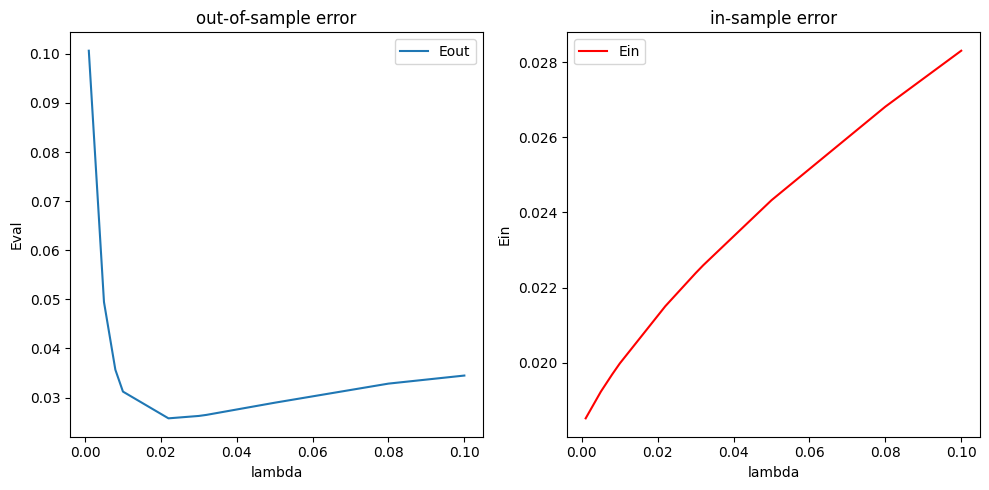

In [34]:
ein=[]
eout=[]
weights=[]
lambdas = [0.001, 0.005, 0.008, 0.01, 0.022, 0.03, 0.032, 0.05, 0.08, 0.1]
df = pd.read_csv('ET2_Regression_Data.csv',header=None)
X = df.iloc[:,0].values
y = df.iloc[:,1].values
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
# print(X_train.shape)
# print(y_train.shape)
for l in lambdas: 
    # print(y_train.shape)   
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)
    print("lambda: ", l, "Ein: ", ein[-1], "Eout: ", eout[-1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(lambdas,eout, label='Eout')
plt.xlabel('lambda')
plt.ylabel('Eval')
plt.title("out-of-sample error")
plt.legend()

plt.subplot(1,2,2)
plt.plot(lambdas,ein, 'r', label='Ein') 
plt.xlabel('lambda')
plt.ylabel('Ein')
plt.title("in-sample error")
plt.legend()
   


plt.tight_layout()
plt.show()

<span style = "color:green">The above plots show us the optimal value of l would be when the lambda = 0.03 and underfitting would be more visible in the range less than 0.01 and over fitting visible over the range of 0.10</span>

In [372]:
# Choose lambda values
lambda_overfit = 0.001
lambda_optimal = 0.03
lambda_underfit = 100

df = pd.read_csv('ET2_Regression_Data.csv',header=None)
X = df.iloc[:,0].values
y = df.iloc[:,1].values

X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# Fit models



weight = linreg_weights(X_train, y_train)


y_pred = linreg_predict(weight,X_test)
print(y_pred)
eout_optimal = calc_error(weight,X_test,y_test) 

print("Eout without regularization: ", eout_optimal)

print("accuracy_score witho: ", 1 - eout_optimal)

w_overfit_regularized = weights_reg(X_train, y_train, lambda_overfit)
w_optimal_regularized = weights_reg(X_train, y_train, lambda_optimal)
w_underfit_regularized = weights_reg(X_train, y_train, lambda_underfit)


y_pred_overfit = linreg_predict(w_overfit_regularized,X_test)
y_pred_optimal = linreg_predict(w_optimal_regularized,X_test)
y_pred_underfit = linreg_predict(w_underfit_regularized,X_test)

eout_overfit_regularized = calc_error(w_overfit_regularized,X_test,y_test)
eout_optimal_regularized = calc_error(w_optimal_regularized,X_test,y_test)
eout_underfit_regularized = calc_error(w_underfit_regularized,X_test,y_test)  

print("Eout Overfit regularized: ", eout_overfit_regularized)
print("Eout Optimal regularized: ", eout_optimal_regularized)
print("Eout Underfit regularized: ", eout_underfit_regularized)

print("accuracy_score_overfit regularized: ", 1 - eout_overfit_regularized)
print("accuracy_score_optimal regularized: ", 1 - eout_optimal_regularized)
print("accuracy_score_underfit regularized: ", 1 - eout_underfit_regularized)




# # Plot
# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# plt.scatter(X_test[0], X_test[0], label='Target function')
# # plt.plot(X_test, y_pred_overfit, 'r', label='Overfit model')
# plt.title('Overfitting')
# plt.legend()

# plt.subplot(1, 3, 2)
# plt.scatter(X_test[0], X_test[48], label='Target function')
# # plt.plot(X_test, y_pred_optimal, 'r', label='Optimal model')
# plt.title('Optimal')
# plt.legend()

# plt.subplot(1, 3, 3)
# plt.scatter(X_test[0], X_test[1], label='Target function')
# # plt.plot(X_test, y_pred_underfit, 'r', label='Underfit model')
# plt.title('Underfitting')
# plt.legend()

# plt.tight_layout()
# plt.show()

[ 2.86738044e+01  4.40465117e+01  4.32548036e+01  1.04285194e+00
  6.53425027e-01  1.11000595e+00  2.27656724e+00  1.16741503e+00
  1.00947586e+00  1.02119333e+00  6.35601228e-01  1.12314214e+00
  3.06781468e+03  8.10858656e-01  6.59600419e-01  9.39985743e-01
  1.02717068e+04  1.22894867e+00  7.50965443e-01 -5.85708667e+01
  7.99438925e-01  6.69027579e+00  1.06103685e+00  1.27958322e+00
  1.33830511e+00  1.33007094e+00  1.10305726e+00  9.20997579e-01
  8.11979290e-01  1.24572907e+00  7.70583769e-01  6.31237451e+02
  1.17155403e+00  1.16397429e+00  7.58018622e-01  9.82100824e-01
  7.83112472e-01  1.00825910e+00  1.02349325e+00  1.09490147e+00
  1.53620054e+01  3.26544875e-01  6.86393906e-01  8.18684410e-01
  1.27637820e+00  9.25804688e-01  5.35695874e+01  1.25279609e+00
  1.13552416e+00  2.88119416e+04]
Eout without regularization:  18908676.553026475
accuracy_score witho:  -18908675.553026475
Eout Overfit regularized:  0.10063010498088243
Eout Optimal regularized:  0.026251431317923544

Please add cells according to your own requirements.

X shape (70,)
extra shape (70, 49)
RMSE Overfit:  0.6488608074683542
RMSE Optimal:  0.6241536258991845
RMSE Underfit:  0.57500682486093
(14, 50)
(14,)
<class 'numpy.ndarray'>


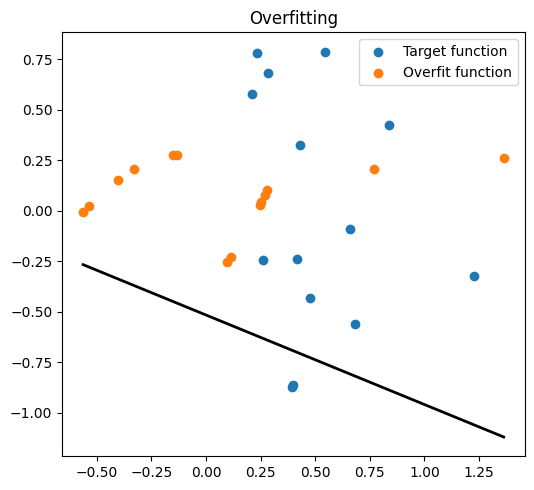

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Et2_Regression_Data.csv')
X = data.iloc[:, :-1].values
X = df.iloc[:,0].values
y = df.iloc[:,1].values

X_transformed = transPoly(X,50)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)



# Plot three sub-plots for an overfitted model, a model with the optimal lambda, and an underfitted model
lambda_overfit = 0.001
lambda_underfit = 1
lambda_optimal = 0.03

w_overfit = weights_reg(X_train, y_train, lambda_overfit)
w_underfit = weights_reg(X_train, y_train, lambda_underfit)
w_optimal = weights_reg(X_train, y_train, lambda_optimal)

y_pred_overfit = linreg_predict(w_overfit,X_test)
y_pred_optimal = linreg_predict(w_optimal,X_test)
y_pred_underfit = linreg_predict(w_underfit,X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

rmse_overfit = np.sqrt(mean_squared_error(y_test, y_pred_overfit))
rmse_optimal = np.sqrt(mean_squared_error(y_test, y_pred_optimal))
rmse_underfit = np.sqrt(mean_squared_error(y_test, y_pred_underfit))

print("RMSE Overfit: ", rmse_overfit)
print("RMSE Optimal: ", rmse_optimal)
print("RMSE Underfit: ", rmse_underfit)



plt.figure(figsize=(15, 5))

print(X_test.shape)
print(y_test.shape)

plt.subplot(1, 3, 1)
plt.scatter(X_test[:,1], y_test, label='Target function')
plt.scatter(X_test[:,2], y_pred_optimal, label='Overfit function')
# plt.plot(X_test, y_pred_overfit, 'r', label='Overfit model')
plt.title('Overfitting')
plt.legend()

# plt.subplot(1, 3, 2)
# plt.plot(X_test, y_test, label='Target function')
# plt.plot(X_test, y_pred_optimal, 'r', label='Optimal model')
# plt.title('Optimal')
# plt.legend()

# plt.subplot(1, 3, 3)
# plt.plot(X_test, y_test, label='Target function')
# plt.plot(X_test, y_pred_underfit, 'r', label='Underfit model')
# plt.title('Underfitting')
# plt.legend()
print(type(X_test))
x_min = X_test[:, 2].min()
x_max = X_test[:, 2].max()
boundary_points = decision_boundary(weights, x_min, x_max)
plt.plot([x_min, x_max], boundary_points, color='black', linestyle='-', linewidth=2, label='Decision Boundary')

plt.tight_layout()
plt.show()

(56, 50)
(56,)


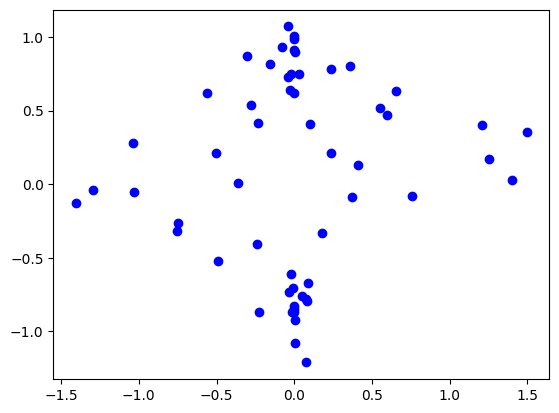

In [166]:
print(X_train.shape)
print(y_train.shape)
plt.scatter(X_train[:, 2], y_train, color='blue', label = 'data')

Optimal lambda:  0.06306306306306306
Eout at optimal lambda:  0.03297511691472739


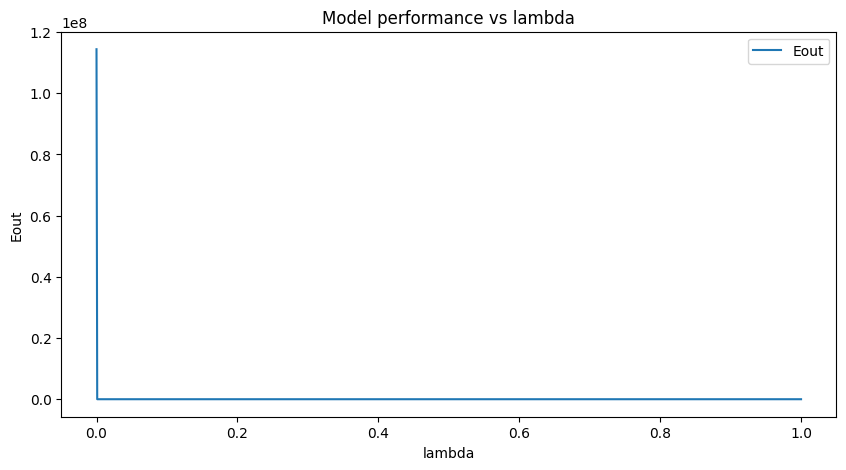

/var/folders/qm/1mhd6dcd177_v8wdp6x3rq2m0000gn/T/ipykernel_93006/2915235922.py:67: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


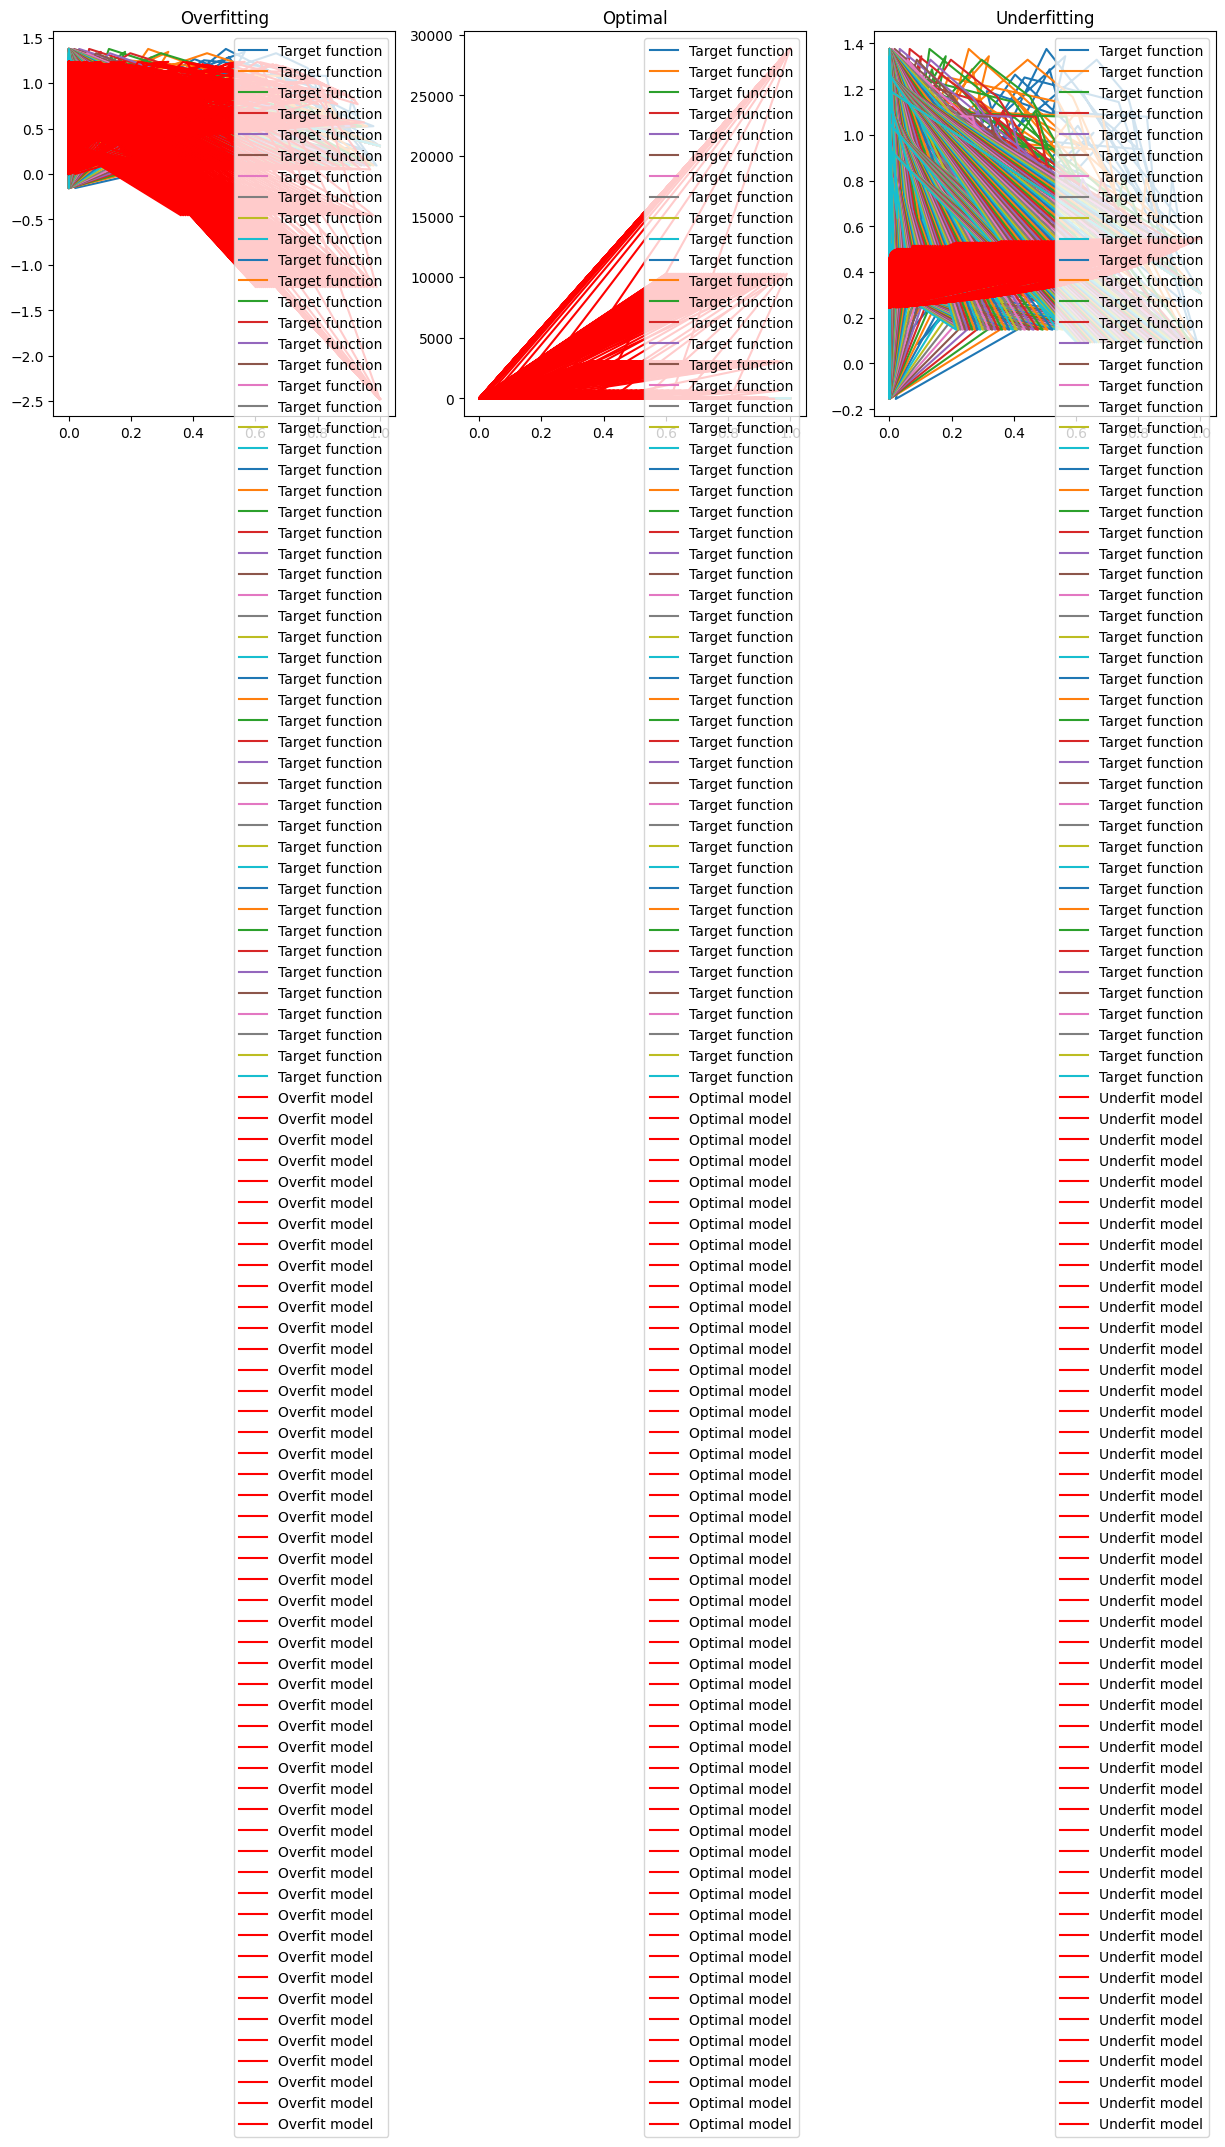

In [536]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define a range of lambda values
lambdas = np.linspace(0, 1, 1000)

# Initialize lists to store the Eout values for each lambda
Eout_values = []

# For each lambda value
for lambda_ in lambdas:
    # Fit the model and compute Eout
    w = weights_reg(X_train, y_train, lambda_)
    y_pred = linreg_predict(w, X_test)
    Eout = mean_squared_error(y_test, y_pred)
    Eout_values.append(Eout)

# Find the optimal lambda (the one that minimizes Eout)
lambda_optimal = lambdas[np.argmin(Eout_values)]

# Print the optimal lambda and the corresponding Eout
print("Optimal lambda: ", lambda_optimal)
print("Eout at optimal lambda: ", min(Eout_values))

# Plot model performance vs lambda
plt.figure(figsize=(10, 5))
plt.plot(lambdas, Eout_values, label='Eout')
plt.xlabel('lambda')
plt.ylabel('Eout')
plt.title('Model performance vs lambda')
plt.legend()
plt.show()

# Plot three sub-plots for an overfitted model, a model with the optimal lambda, and an underfitted model
lambda_overfit = 0.001
lambda_underfit = 100

w_overfit = weights_reg(X_train, y_train, lambda_overfit)
w_underfit = weights_reg(X_train, y_train, lambda_underfit)

y_pred_overfit = linreg_predict(w_overfit, X_test)
y_pred_optimal = linreg_predict(w_optimal, X_test)
y_pred_underfit = linreg_predict(w_underfit, X_test)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(X_test, y_test, label='Target function')
plt.plot(X_test, y_pred_overfit, 'r', label='Overfit model')
plt.title('Overfitting')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(X_test, y_test, label='Target function')
plt.plot(X_test, y_pred_optimal, 'r', label='Optimal model')
plt.title('Optimal')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(X_test, y_test, label='Target function')
plt.plot(X_test, y_pred_underfit, 'r', label='Underfit model')
plt.title('Underfitting')
plt.legend()

plt.tight_layout()
plt.show()

## Reflection

In your reflection, makes sure to answer the following questions:
- Interpret the information in the requested figures.
- Explain the strategy chosen to decide on the optimum amount of regularisation.
- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

# Task 3

Please add cells according to your own requirements.

X shape (100,)
extra shape (100, 49)
lambda without reguralization:  0.0
Eout without regularization : 18908676.553014282
optimal lambda : 0.022022022022022022
Eout at optimal lambda:  0.025763336647951576


899 0.8998998998998999


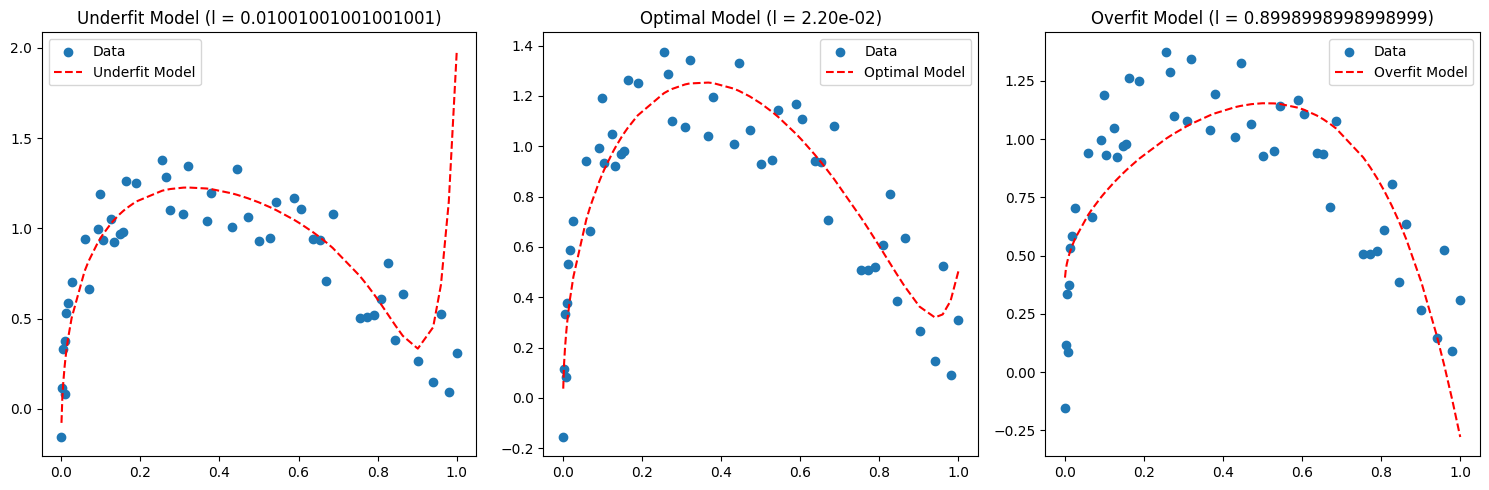

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv("Et2_Regression_Data.csv", header=None)
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values


ein=[]
eout=[]
weights=[]
lambdas = np.linspace(0, 1, num=1000)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)
    # if l <= 0.022022022022022022:
    #     print("lambda: ", l, "Ein: ", ein[-1], "Eout: ", eout[-1])


print("lambda without reguralization: ", lambdas[0])
print("Eout without regularization :", eout[0]) # since we start with 0 value for lambda ie. no regularization

optimal_lambda_index = np.argmin(eout)  # finding optimal lambda where we have smallest eout
optimal_lambda = lambdas[optimal_lambda_index]
print("optimal lambda :", optimal_lambda)
print("Eout at optimal lambda: ", eout[optimal_lambda_index])
print("\n")

underfit_index = np.abs(np.array(lambdas)- 0.9).argmin()
print(underfit_index, lambdas[underfit_index])
# 0.001001001001001001

fig, column = plt.subplots(1, 3, figsize=(15, 5)) # creating subplots with 3 columns
column[0].scatter(X_test[:, 1], y_test, label='Data')
column[1].scatter(X_test[:, 1], y_test, label='Data')
column[2].scatter(X_test[:, 1], y_test, label='Data')

x_range = np.linspace(X_train.min(), X_train.max(), 100) # creating a range of values for x-axis using the train values

y_pred_optimal = linreg_predict(weights[optimal_lambda_index], X_test) # predicting y values using optimal lambda

# Get the indices that would sort X_test
sort_indices = np.argsort(X_test[:, 1])

# Use these indices to sort X_test and y_pred_optimal
X_test_sorted = X_test[:, 1][sort_indices]
y_pred_optimal_sorted = y_pred_optimal[sort_indices]

y_pred_optimal = linreg_predict(weights[optimal_lambda_index], X_test) # predicting y values using optimal lambda


y_pred_underfit = linreg_predict(weights[1], X_test) # predicting y values using optimal lambda

y_pred_overfit = linreg_predict(weights[899], X_test) 

# Get the indices that would sort X_test
sort_indices = np.argsort(X_test[:, 1])

# Use these indices to sort X_test and y_pred_optimal
X_test_sorted = X_test[:, 1][sort_indices]
y_pred_optimal_sorted = y_pred_optimal[sort_indices]
y_pred_overfit_sorted = y_pred_overfit[sort_indices]
y_pred_underfit_sorted = y_pred_underfit[sort_indices]


# sort_indices_original = np.argsort(X_test[:, 0])
# X_test_original_sorted = X_test[:, 0][sort_indices_original]
# y_test_sorted = y_test[sort_indices_original]




column[0].plot(X_test_sorted, y_pred_underfit_sorted, 'r--', label='Underfit Model')
# column[0].plot(X_test[:, 0], y_test, 'b', label='Target Function')
column[0].set_title('Underfit Model (l = 0.01001001001001001)')
column[0].legend()

# Now you can plot the sorted values
column[1].plot(X_test_sorted, y_pred_optimal_sorted, 'r--', label='Optimal Model')
# column[0].plot(X_test[:, 0], y_test, 'b', label='Target Function')
column[1].set_title(f'Optimal Model (l = {optimal_lambda:.2e})')
column[1].legend()

column[2].plot(X_test_sorted, y_pred_overfit_sorted, 'r--', label='Overfit Model')
# column[0].plot(X_test[:, 0], y_test, 'b', label='Target Function')
column[2].set_title('Overfit Model (l = 0.8998998998998999)')
column[2].legend()

# # Find the optimal lambda
# optimal_lambda_index = np.argmin(eout)
# optimal_lambda = lambdas[optimal_lambda_index]
# print(optimal_lambda)
# a = np.argmax(eout)
# weight_a = weights[a]
# print(a)

# ind = np.abs(np.array(lambdas)- 0.001001001001001001).argmin()
# print("ind",ind)
# print("Eout at lambda = 0.001001001001001001: ", eout[ind])
# print("weight at lambda = 0.001001001001001001: ", weights[ind])
# optimal_weights = weights[optimal_lambda_index]

# # Compare Eout obtained with optimal lambda with Eout obtained without regularization
# print("Test error with optimal lambda:", eout[optimal_lambda_index])
# print("Test error without regularization:", eout[0])

# Provide an example of overfitted, optimal, and underfitted models
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot target function
# axes[0].scatter(X_test[:, 1], y_test, label='Data')
# axes[1].scatter(X_test[:, 1], y_test, label='Data')
# axes[2].scatter(X_test[:, 1], y_test, label='Data')

# x_range = np.linspace(X_train.min(), X_train.max(), 100)
# axes[0].plot(x_range, np.polyval(np.polyfit(X_train[:, 1], y_train, 50), x_range), 'r--', label='Target Function')
# axes[1].plot(x_range, np.polyval(np.polyfit(X_train[:, 1], y_train, 50), x_range), 'r--', label='Target Function')
# axes[2].plot(x_range, np.polyval(np.polyfit(X_train[:, 1], y_train, 50), x_range), 'r--', label='Target Function')

# # Plot overfitted model
# axes[0].plot(x_range, linreg_predict(weights[a], transPoly(x_range, 50)), label='Overfitted Model')
# axes[0].set_title('Overfitted Model (l = 0)')
# axes[0].legend()

# # Plot optimal model
# axes[1].plot(x_range, linreg_predict(optimal_weights, transPoly(x_range, 50)), label='Optimal Model')
# axes[1].set_title(f'Optimal Model (l = {optimal_lambda:.2e})')
# axes[1].legend()

# # Plot underfitted model
# axes[2].plot(x_range, linreg_predict(weights[1], transPoly(x_range, 50)), label='Underfitted Model')
# axes[2].set_title('Underfitted Model (l = 1)')
# axes[2].legend()

plt.tight_layout()
plt.show()


(50,)
X_test_sorted [4.08121620e-04 2.55076013e-03 4.99948985e-03 8.26446281e-03
 1.02030405e-02 1.23456790e-02 1.72431385e-02 2.61197837e-02
 5.87695133e-02 6.89725538e-02 9.18273646e-02 9.80512193e-02
 1.04479135e-01 1.24987246e-01 1.32231405e-01 1.47331905e-01
 1.55188246e-01 1.63248648e-01 1.88654219e-01 2.55076013e-01
 2.65381084e-01 2.75890215e-01 3.08641975e-01 3.19967350e-01
 3.67309458e-01 3.79655137e-01 4.31078461e-01 4.44444444e-01
 4.71788593e-01 4.99948985e-01 5.28925620e-01 5.43720029e-01
 5.89327620e-01 6.04938272e-01 6.36771758e-01 6.52994592e-01
 6.69421488e-01 6.86052444e-01 7.54616876e-01 7.72268136e-01
 7.90123457e-01 8.08182838e-01 8.26446281e-01 8.44913784e-01
 8.63585348e-01 9.01540659e-01 9.40312213e-01 9.60004081e-01
 9.79900010e-01 1.00000000e+00]
ypred [-0.06274955  0.06851654  0.15281089  0.234448    0.27424753  0.3133557
  0.38946205  0.49821272  0.75481796  0.81101462  0.91342075  0.93689922
  0.95951476  1.0221204   1.04122216  1.0767428   1.09315183  1.1

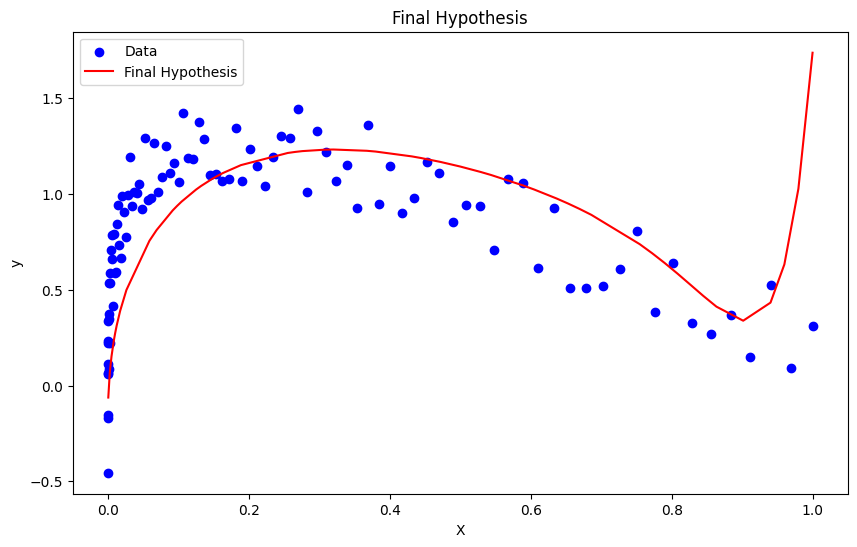

Winning lambda: 0.002002002002002002


In [553]:

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Set up containers to keep track of average performance for each lambda
avg_evals = []
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(X_trans, y, train_size=0.5, random_state =5)

# Loop over splits
for train_index, val_index in kf.split(X_train_initial):
    X_train, X_val = X_train_initial[train_index], X_train_initial[val_index]
    y_train, y_val = y_train_initial[train_index], y_train_initial[val_index]
    
    # Set up containers for errors
    evals = []
    
    # Loop over lambdas
    lambdas = np.linspace(0, 1, 1000) # Choose a suitable range of lambdas here
    for l in lambdas:
        w = weights_reg(X_train, y_train, l)
        evals.append(calc_error(w, X_val, y_val))
    
    avg_evals.append(evals)

# Calculate average error for each lambda
avg_evals = np.mean(np.array(avg_evals), axis=0)

# Find the winning lambda
winning_lambda_index = np.argmin(avg_evals)
winning_lambda = lambdas[winning_lambda_index]

# Train the model with the winning lambda using all data
final_weights = weights_reg(X_train_initial, y_train_initial, winning_lambda)

# Plot the final hypothesis
plt.figure(figsize=(10, 6))

plt.scatter(X_trans[:,2], y, color='blue', label='Data')


y_pred = linreg_predict(final_weights, X_test_initial) # predicting y values using optimal lambda

print(y_pred.shape)
sort_indices = np.argsort(X_test[:, 1])
# Use these indices to sort X_test and y_pred_optimal
X_test_sorted = X_test[:, 1][sort_indices]
y_pred = y_pred[sort_indices]
print("X_test_sorted", X_test_sorted)

# y_pred = np.sort(y_pred)
print("ypred",y_pred)


# y_pred = linreg_predict(final_weights, X_range_trans)
plt.plot(X_test_sorted, y_pred, color='red', label='Final Hypothesis')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Final Hypothesis')
plt.legend()
plt.show()

# Print the winning lambda and final weights
print("Winning lambda:", winning_lambda)
# print("Final weights:", final_weights)

In [512]:
# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Set up containers to keep track of average performance for each lambda
avg_evals = []
X = np.concatenate((np.ones((X.shape[0],1)), X.reshape(-1,1)), axis=1)
# Loop over splits
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Set up containers for errors
    evals = []
    
    # Loop over lambdas
    lambdas = np.linspace(0, 1, 1000) # Choose a suitable range of lambdas here
    for l in lambdas:
        w = weights_reg(X_train, y_train, l)
        evals.append(calc_error(w, X_val, y_val))
    
    avg_evals.append(evals)

# Calculate average error for each lambda
avg_evals = np.mean(np.array(avg_evals), axis=0)

# Find the winning lambda
winning_lambda_index = np.argmin(avg_evals)
winning_lambda = lambdas[winning_lambda_index]

# Train the model with the winning lambda using all data
final_weights = weights_reg(X, y, winning_lambda)

# Plot the final hypothesis
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')

# Predicting y values using the optimal lambda
y_pred = linreg_predict(final_weights, X)

# Sort the predicted values for plotting
sort_indices = np.argsort(X)
X_sorted = X[sort_indices]
y_pred = y_pred[sort_indices]

plt.plot(X_sorted, y_pred, color='red', label='Final Hypothesis')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Final Hypothesis')
plt.legend()
plt.show()

# Print the winning lambda and final weights
print("Winning lambda:", winning_lambda)
print("Final weights:", final_weights)


LinAlgError: Singular matrix

## Reflection
In your reflection, explain the procedure followed by using KFOLDS and your choice of parameters. 

# Task 4

## Reflection

Please reflect on the following:
- Observe the resulting error and l (lambda), and compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?